<a href="https://colab.research.google.com/github/om-369/om-369/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# We are learning ANN.


In [ ]:
!nvidia-smi

Wed Jun 21 17:33:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |    639MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.2
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

#  importing labraries

import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner.tuners import RandomSearch

%matplotlib inline



In [ ]:
os.listdir()

['.config', 'drive', 'untitled_project', 'Churn_Modelling.csv', 'sample_data']

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], axis =1, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
#  One hot encoding the gender and geography

geography_ohe = pd.get_dummies(df.Geography,prefix = 'Geography')
gender_ohe = pd.get_dummies(df.Gender,prefix = 'Gender')

display(geography_ohe)
display(gender_ohe)


,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [ ]:
data = pd.concat([df,geography_ohe,gender_ohe],axis = 1).drop(columns = ['Geography','Gender'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#  Splitting the data

X = data.drop('Exited',axis = 1)
Y = data['Exited']

In [ ]:
tr_x, ts_x, tr_y, ts_y = train_test_split(X,Y, test_size= 0.2, random_state= 64, stratify= Y)
tr_x.shape, ts_x.shape

((8000, 13), (2000, 13))

In [ ]:
#  Normalising the data

normalizer = MinMaxScaler()
tr_x_scaled = pd.DataFrame(normalizer.fit_transform(tr_x),columns = tr_x.columns)
ts_x_scaled = pd.DataFrame(normalizer.transform(ts_x),columns = ts_x.columns)

display(tr_x_scaled)
display(ts_x_scaled)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.856,0.256757,0.3,0.565185,0.000000,0.0,1.0,0.897097,1.0,0.0,0.0,0.0,1.0
1,0.822,0.256757,0.7,0.529020,0.000000,1.0,0.0,0.996501,0.0,0.0,1.0,0.0,1.0
2,0.522,0.418919,0.2,0.354388,0.666667,0.0,0.0,0.807119,1.0,0.0,0.0,1.0,0.0
3,0.714,0.243243,0.6,0.000000,0.000000,0.0,0.0,0.493845,1.0,0.0,0.0,1.0,0.0
4,0.556,0.189189,0.9,0.594410,0.333333,1.0,1.0,0.081600,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.314,0.202703,0.1,0.452186,0.000000,0.0,0.0,0.714458,1.0,0.0,0.0,1.0,0.0
7996,0.498,0.216216,0.2,0.404573,0.000000,0.0,0.0,0.990184,0.0,0.0,1.0,0.0,1.0
7997,0.368,0.445946,0.3,0.000000,0.333333,0.0,1.0,0.103882,0.0,0.0,1.0,0.0,1.0
7998,0.528,0.418919,0.1,0.000000,0.333333,1.0,0.0,0.962222,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.496,0.135135,0.8,0.518106,0.333333,0.0,1.0,0.229867,1.0,0.0,0.0,0.0,1.0
1,0.650,0.175676,0.2,0.362005,0.333333,1.0,0.0,0.301051,0.0,0.0,1.0,0.0,1.0
2,0.572,0.364865,0.7,0.557434,0.000000,1.0,1.0,0.541827,1.0,0.0,0.0,1.0,0.0
3,0.710,0.405405,0.9,0.455042,0.000000,0.0,0.0,0.866338,0.0,1.0,0.0,0.0,1.0
4,0.456,0.297297,0.6,0.253529,0.000000,0.0,0.0,0.374560,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.576,0.216216,0.7,0.000000,0.333333,0.0,0.0,0.019291,0.0,0.0,1.0,1.0,0.0
1996,0.684,0.648649,0.4,0.636641,0.000000,1.0,1.0,0.590779,1.0,0.0,0.0,0.0,1.0
1997,0.740,0.554054,0.6,0.000000,0.333333,1.0,1.0,0.804189,0.0,0.0,1.0,1.0,0.0
1998,0.662,0.540541,0.8,0.371361,0.000000,1.0,1.0,0.698697,1.0,0.0,0.0,1.0,0.0


# Building the Neural Network

## Sequentail_stacking [input layer, hidden layer, output layer]

## Each layer has an activation function common for all the neurons

## Each layer will have distinct kernal_initializer
(weight initializer)

## Each network would have to be compiled using a particular optimisation function

## Each network would have to be compiled using a particular loss function



In [ ]:
# --------------Generating the basic structure of ANN -----------------------

#  initailizing the model

model = tf.keras.Sequential()

#  adding the input layer

model.add(tf.keras.layers.Input(shape = (13,)))

#  adding the hidden layer
# hidden layer - I
model.add(tf.keras.layers.Dense(units = 6,
                                activation = 'relu',
                                kernel_initializer= 'he_normal'))

#  hidden layer- II
model.add(tf.keras.layers.Dense(units = 10,
                                activation = 'relu',
                                kernel_initializer= 'he_uniform'))

#  adding the output layer
model.add(tf.keras.layers.Dense(units = 1,
                               activation = 'sigmoid',
                               kernel_initializer = 'glorot_normal'))

# -------------------- compiling the models ------------------------
model.compile(optimizer='Adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])



In [ ]:
#  summarizing the model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 84        
                                                                 
 dense_5 (Dense)             (None, 10)                70        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model

history_obj = model.fit(x = tr_x_scaled,
                        y = tr_y,
                        batch_size = 100,
                        epochs = 100,
                        validation_data = (ts_x_scaled,ts_y),
                        validation_batch_size =100,
                        use_multiprocessing = True,
                        workers = 10)


Epoch 1/100
80/80 [==============================] - 2s 7ms/step - loss: 0.5825 - accuracy: 0.7456 - precision: 0.2569 - recall: 0.1313 - val_loss: 0.5322 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5050 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4934 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.4870 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4860 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
80/80 [==============================] -

In [ ]:
type(history_obj)

keras.callbacks.History

In [ ]:
dir(history_obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
#  Fetching the required data from history object

def visualizer (history_obj1,parameter):
  plt.figure(figsize = (20,10))
  train_param = history_obj1.history.get(parameter)
  val_param = history_obj1.history.get(f'val_{parameter}')
  epochs = history_obj1.epoch

  sns.lineplot(x = epochs, y = train_param )
  sns.lineplot(x = epochs, y = val_param)

  plt.legend(labels = [parameter, f'val_{parameter}'])
  plt.xticks(ticks = epochs,labels = epochs, rotation = 90)
  plt.yticks(ticks = [i/100 for i in  range(10,110,10)], labels = [i/100 for i in  range(10,110,10)])
  plt.show()

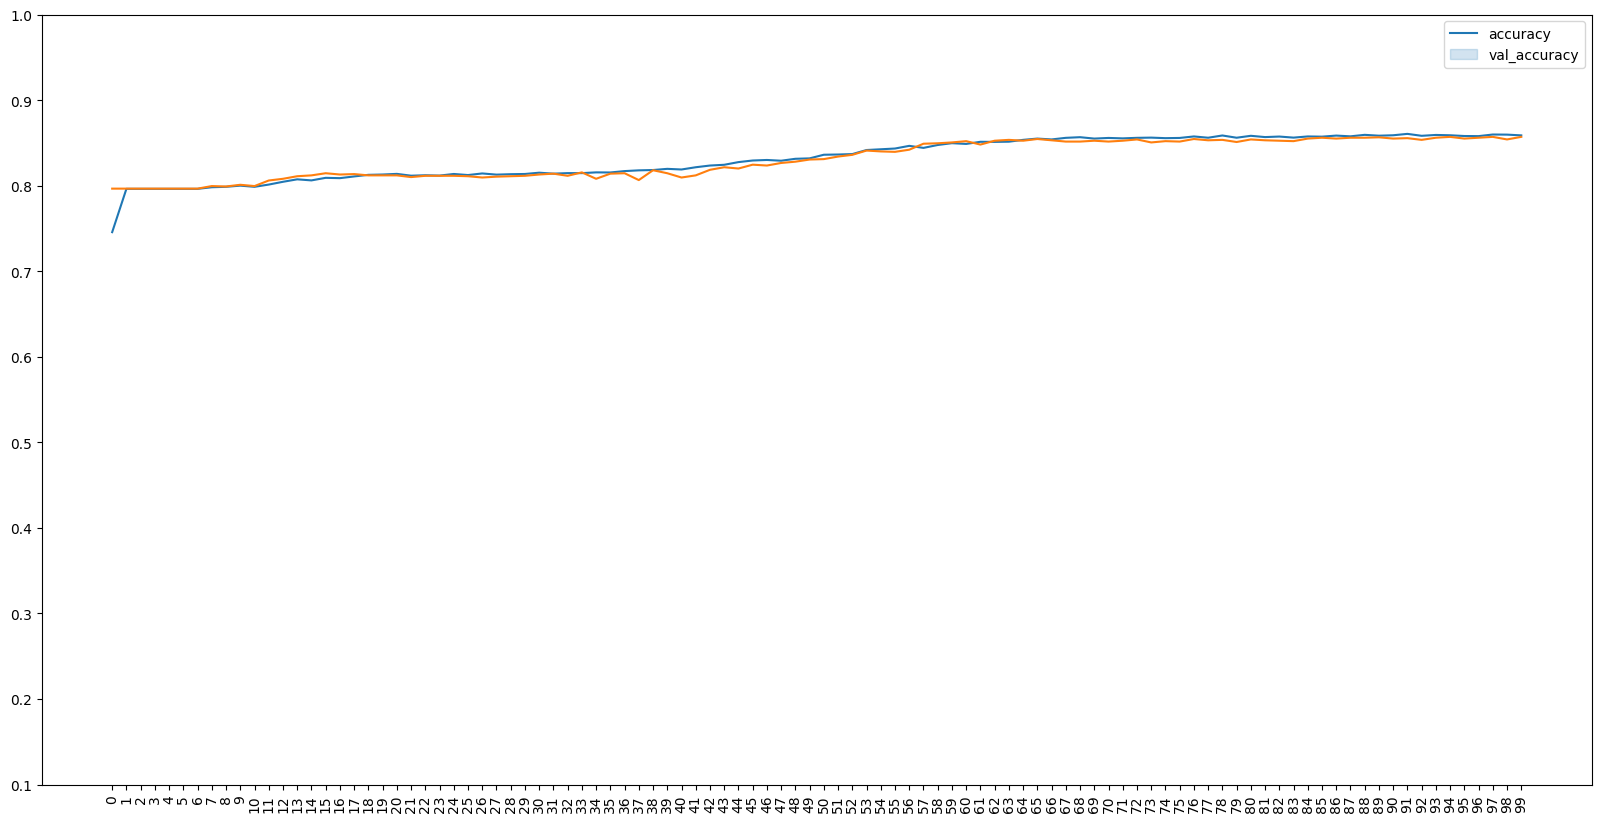

In [ ]:
visualizer(history_obj, 'accuracy')

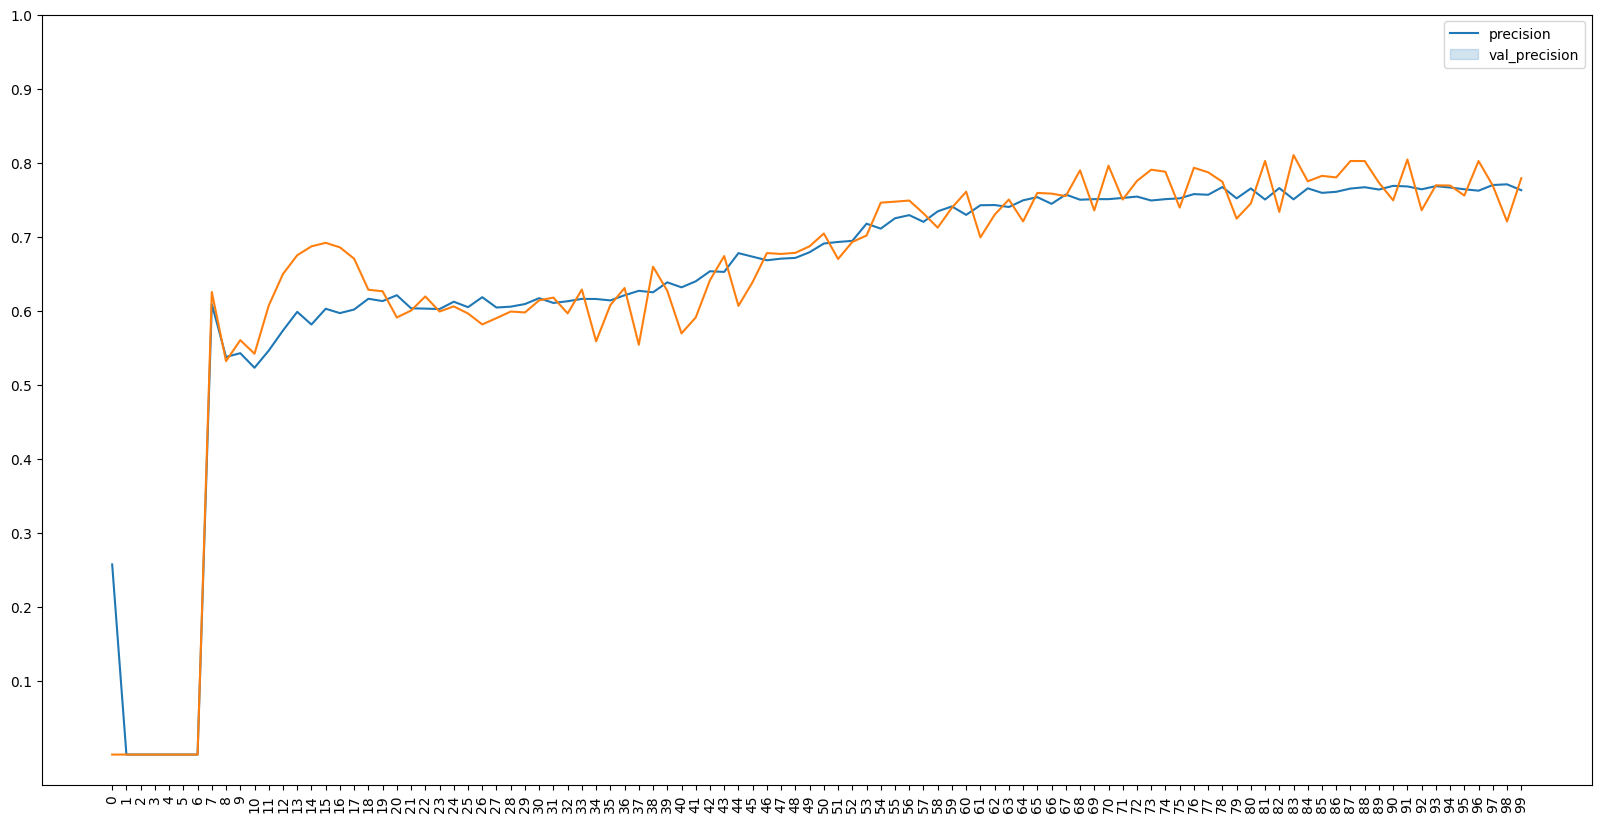

In [ ]:
visualizer(history_obj, 'precision')

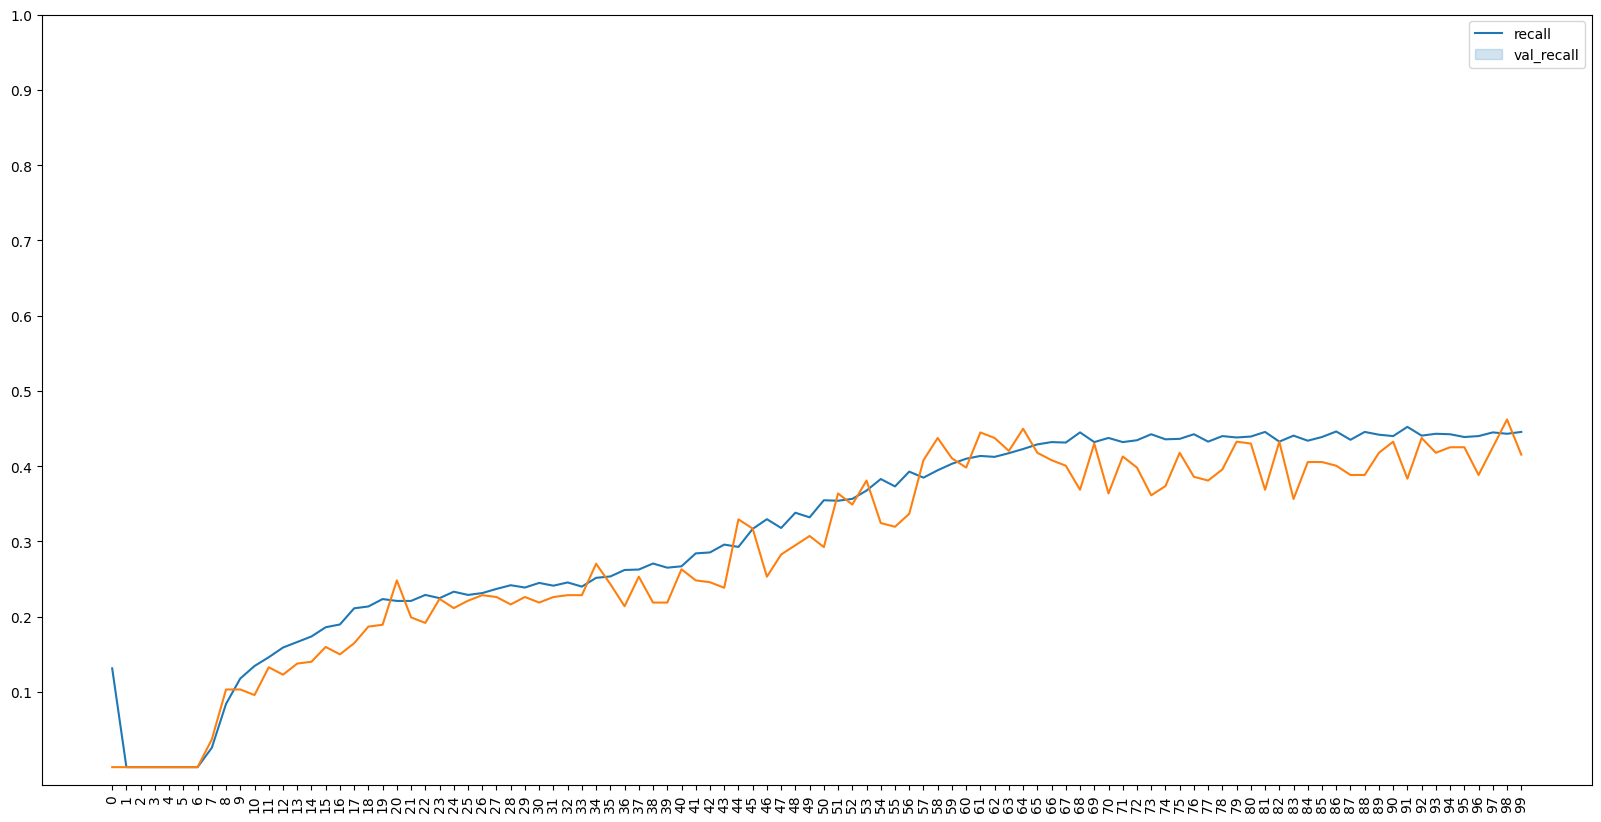

In [ ]:
visualizer(history_obj, 'recall')

# Early stopping

In [ ]:
early_stopper = EarlyStopping(monitor = 'accuracy', patience = 10)

In [ ]:
#  Training the model

history_obj2 = model.fit(x = tr_x_scaled,
                         y = tr_y,
                         batch_size = 100,
                         epochs = 150,
                         validation_data = (ts_x_scaled,ts_y),
                         validation_batch_size= 100,
                         use_multiprocessing= True,
                         workers = 10,
                         callbacks = [early_stopper])

Epoch 1/150
80/80 [==============================] - 0s 5ms/step - loss: 0.3393 - accuracy: 0.8593 - precision: 0.7658 - recall: 0.4454 - val_loss: 0.3564 - val_accuracy: 0.8545 - val_precision: 0.7685 - val_recall: 0.4079
Epoch 2/150
80/80 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8596 - precision: 0.7627 - recall: 0.4515 - val_loss: 0.3578 - val_accuracy: 0.8555 - val_precision: 0.7783 - val_recall: 0.4054
Epoch 3/150
80/80 [==============================] - 0s 4ms/step - loss: 0.3391 - accuracy: 0.8596 - precision: 0.7700 - recall: 0.4436 - val_loss: 0.3575 - val_accuracy: 0.8580 - val_precision: 0.7860 - val_recall: 0.4152
Epoch 4/150
80/80 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.8595 - precision: 0.7669 - recall: 0.4460 - val_loss: 0.3573 - val_accuracy: 0.8530 - val_precision: 0.7404 - val_recall: 0.4275
Epoch 5/150
80/80 [==============================] - 0s 6ms/step - loss: 0.3392 - accuracy: 0.8593 - precisi

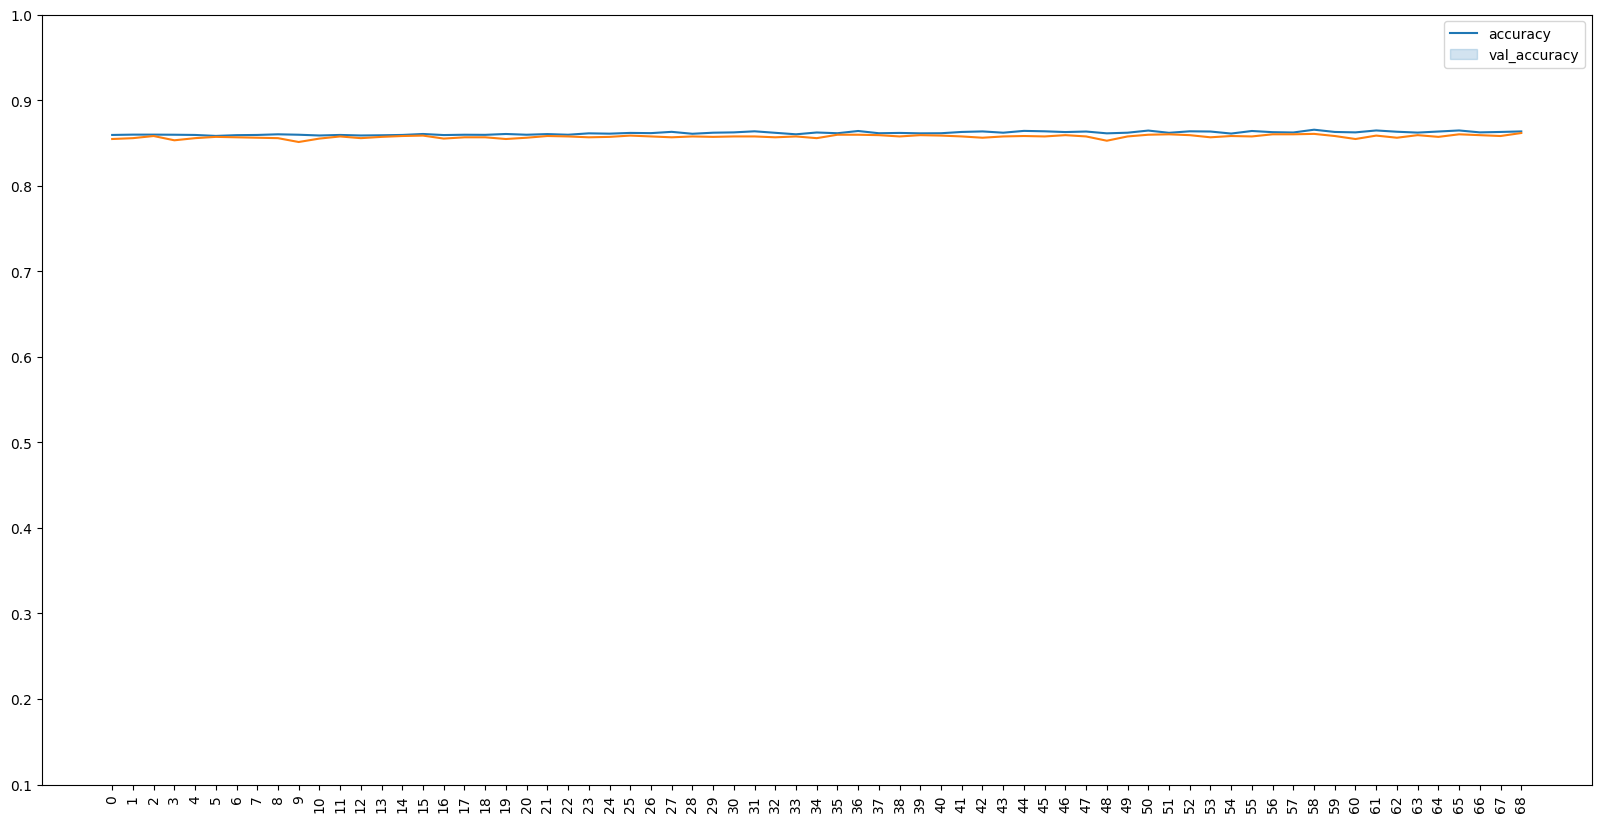

In [ ]:
visualizer(history_obj2,'accuracy')

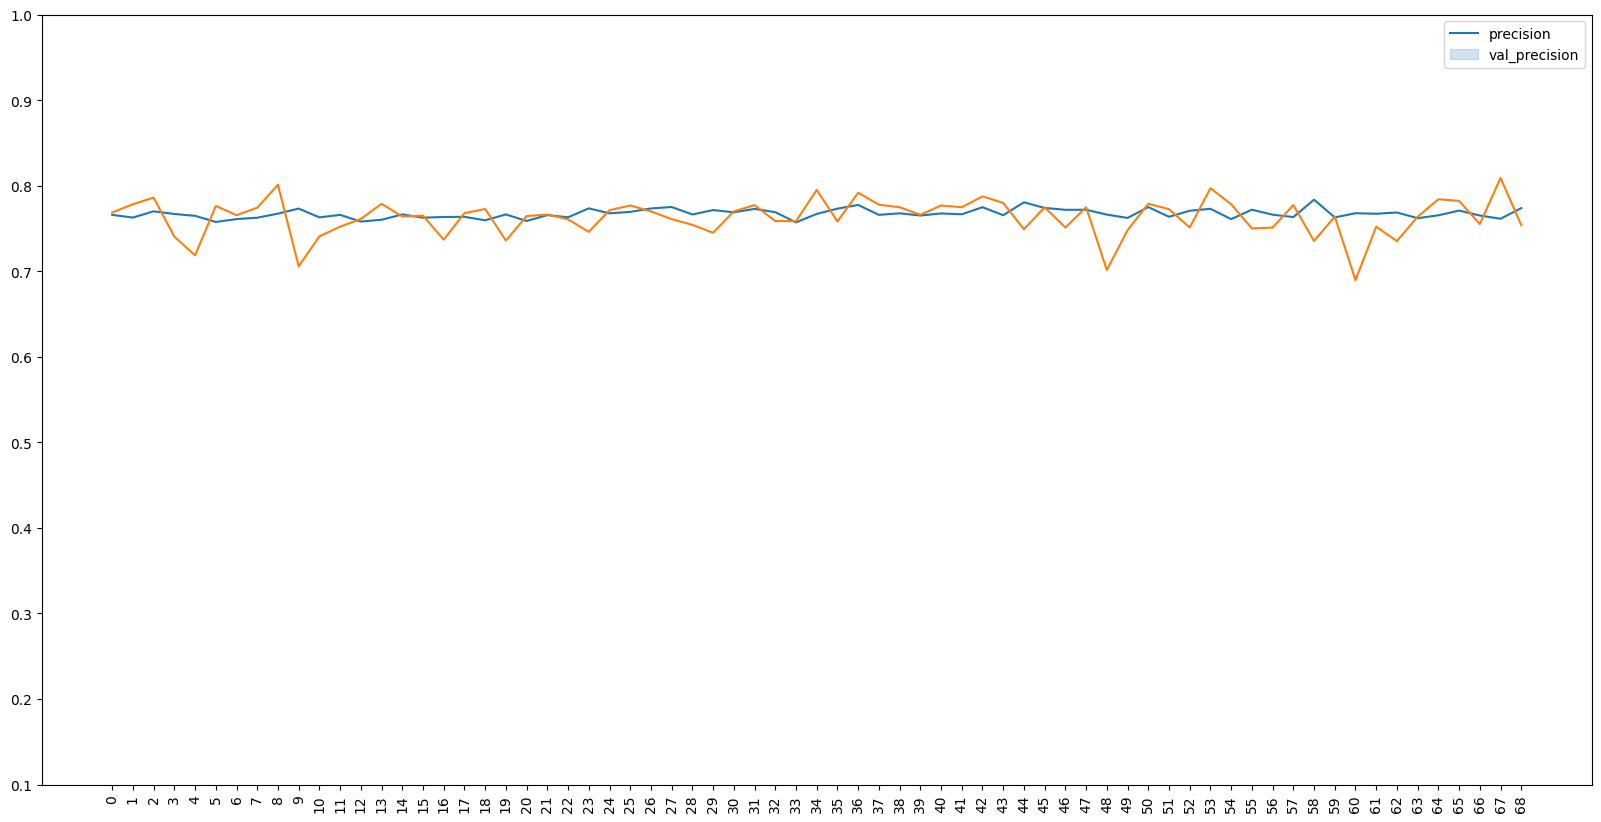

In [ ]:
visualizer(history_obj2,'precision')

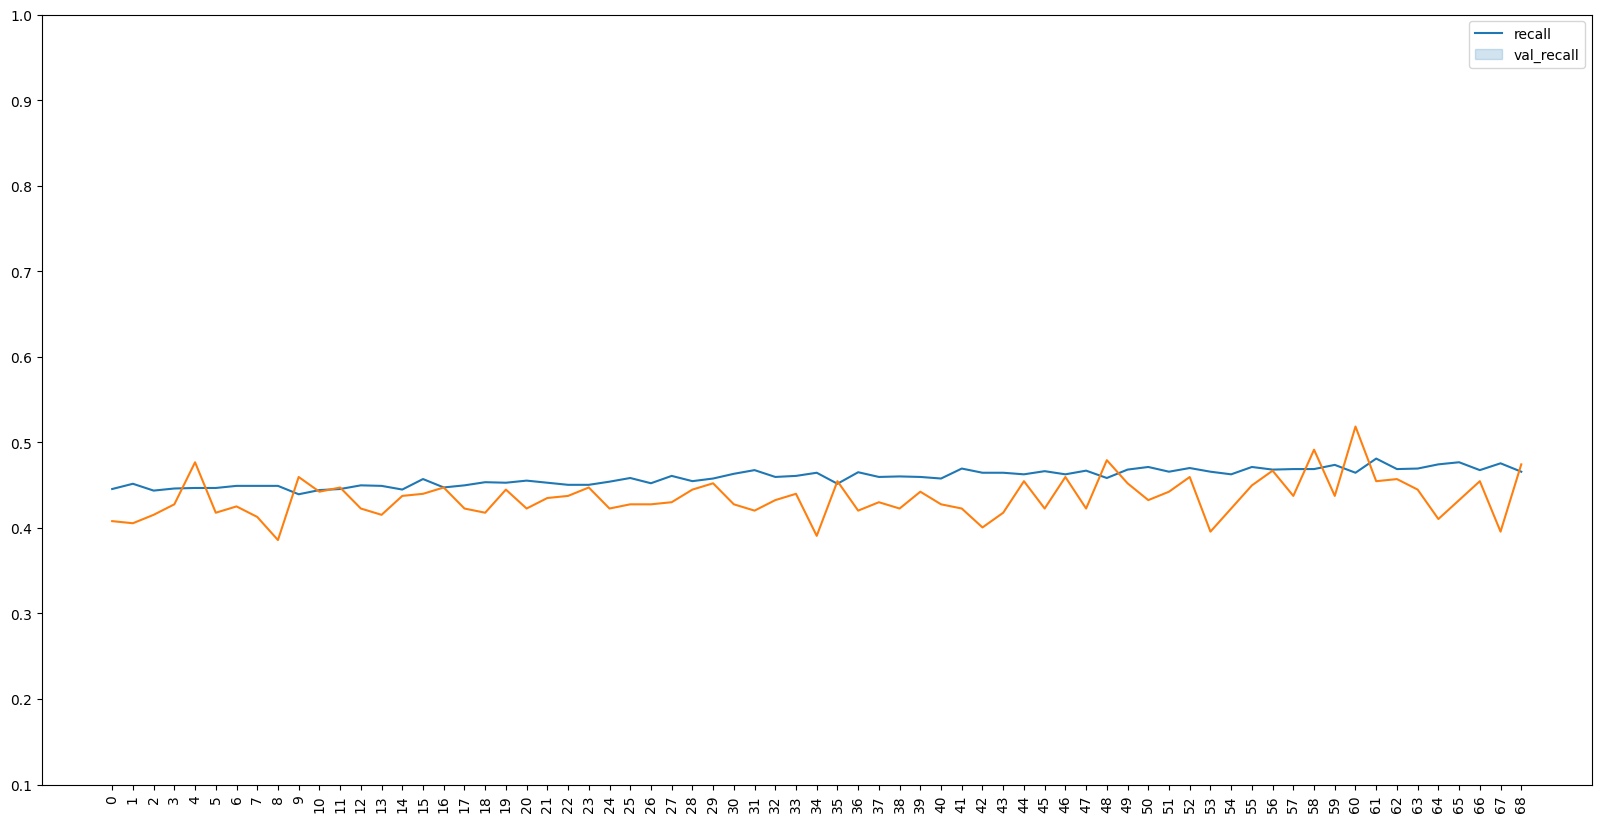

In [ ]:
visualizer(history_obj2,'recall')

# Hyperparameter tuning of ANN

## 1.hyperparameter.Choice (list_of_elements)
## 2.hyperparameter.Int(range_of_element)



In [ ]:
def hypermodel(hyp):
  model = tf.keras.Sequential()

  #  adding the input layer
  model.add(tf.keras.layers.Input(shape = (13,)))

  # adding the hidden layers
  for layer_num in range(hyp.Int('number of hidden layers', min_value = 1, max_value = 18)):

    model.add(tf.keras.layers.Dense(units = hyp.Int(f'number of neurons in layer {layer_num}',min_value = 4,max_value = 21, step = 4),
                                    activation = hyp.Choice(f'activation function use in layer {layer_num}',['sigmoid','relu']),
                                    kernel_initializer=hyp.Choice(f'kernel_initializer use in layer { layer_num}',['he_normal','he_uniform','glorot_uniform'])))
  #  adding the output layer
  model.add(tf.keras.layers.Dense(units = 1,
                                  activation = 'sigmoid',
                                  kernel_initializer=hyp.Choice('kernel_initializer in output layer ', ['he_normal','he_uniform','glorot_normal','glorot_uniform'])))


  #  compiling the model
  model.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','recall'])
  return model


In [ ]:
from keras_tuner.engine import tuner


In [ ]:
# # Generating the tuner object
tuner = RandomSearch(hypermodel = hypermodel,
                    objective = 'accuracy')

In [ ]:
#  summarizing the tuner object

tuner.search_space_summary()

Search space summary
Default search space size: 56
number of hidden layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 18, 'step': 1, 'sampling': 'linear'}
number of neurons in layer 0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 21, 'step': 4, 'sampling': 'linear'}
activation function use in layer 0 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
kernel_initializer use in layer 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_uniform'], 'ordered': False}
kernel_initializer in output layer  (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
number of neurons in layer 1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 21, 'step': 4, 'sampling': 'linear'}
activation function use in layer 1 (Choice)
{'default': 'sigmoid', '

In [ ]:
pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.utils import custom_object_scope

In [ ]:
# %load_ext tensorboard
#  Tuning the model

tuner.search(tr_x_scaled, tr_y, epochs = 10, batch_size = 100 )

In [ ]:
pip install Tensor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.8 MB/s eta 0:00:00
  Created wheel for Tensor: filename=tensor-0.3.6-py3-none-any.whl size=71551 sha256=95adf1f0404391

In [ ]:
# fetching the best model on tuned objects

best_model = tuner.get_best_models()[0]


NotFoundError: ignored

In [ ]:
# summarizing the best model
best_model.summary()

NameError: ignored

In [ ]:
# saving the model

#  creating the new directory for the model weights
model_weight_dir = 'Weights'
os.makedirs(model_weight_dir, exist_ok = True)

# saving the model
best_model.save(os.path.join(model_weight_dir,'Best_model.tf'),save_format = 'tf')


In [ ]:
# Loading the saved model
load_model = tf.keras.models.load_model(os.path.join(model_weight_dir,'Best_model.tf'))

In [ ]:
load_model.summary()

In [ ]:
# Load model evaluation
evaluation = load_model.evaluate(x = ts_x_scaled, y = ts_y, batch_size = 100)

In [ ]:
# Load model evaluation
evaluation = load_model.evaluate(x = tr_x_scaled, y = tr_y, batch_size = 100)

In [ ]:
y_pred2 = load_model.predict(ts_x_scaled)
y_pred2

In [ ]:
y_pred = list(map(int, y_pred2 >= 0.5))
y_pred